In [ ]:
import pandas as pd

# Original dataset
data = {
    'T ON (micro second)': [12, 10, 14, 14, 12, 12, 12, 12, 10, 14, 12],
    'WF (m/min)': [6, 2, 2, 4, 4, 4, 6, 2, 4, 4, 4],
    'WT (gf)': [8, 6, 6, 4, 6, 6, 4, 8, 8, 8, 6],
    'Kerf Width (micro meter)': [350.97, 348.83, 358.24, 365.45, 359.03, 358.03, 362.69, 330.23, 320.14, 325.49, 357.03],
    'Surface Roughness (micro meter)': [1.731, 1.77, 1.834, 1.862, 1.803, 1.815, 1.801, 1.74, 1.705, 1.769, 1.803],
    'Surface Crack Density (micro meter)': [0.057, 0.069, 0.134, 0.144, 0.087, 0.098, 0.077, 0.061, 0.044, 0.074, 0.092],
    'Corner Diameter (micro meter)': [375.38, 376.79, 391.61, 394.01, 386.61, 387.7, 391.53, 382.91, 369.75, 383.48, 386.31]
}

df = pd.DataFrame(data)

# Number of additional points needed
additional_points = 100 - len(df)

# Resample the existing data to generate additional points
expanded_data = pd.concat([df] + [df.sample(n=len(df), replace=True) for _ in range(additional_points)], ignore_index=True)

# Save the expanded data as a CSV file
expanded_data.to_csv('expanded_dataset.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv("expanded.csv")

# Display the loaded dataset
print(df)


     T ON (micro second)  WF (m/min)  WT (gf)  Kerf Width (micro meter)  \
0                     12           6        8                    350.97   
1                     10           2        6                    348.83   
2                     14           2        6                    358.24   
3                     14           4        4                    365.45   
4                     12           4        6                    359.03   
..                   ...         ...      ...                       ...   
985                   14           2        6                    358.24   
986                   10           4        8                    320.14   
987                   12           4        6                    357.03   
988                   12           2        8                    330.23   
989                   12           6        8                    350.97   

     Surface Roughness (micro meter)  Surface Crack Density (micro meter)  \
0                     

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

In [ ]:
df = pd.DataFrame(data)

# Separate features and target variables
X = df.drop(columns=['Kerf Width (micro meter)', 'Surface Roughness (micro meter)', 'Surface Crack Density (micro meter)', 'Corner Diameter (micro meter)'])

# Individual output variables
y_kerf_width = df['Kerf Width (micro meter)']
y_surface_roughness = df['Surface Roughness (micro meter)']
y_surface_crack_density = df['Surface Crack Density (micro meter)']
y_corner_diameter = df['Corner Diameter (micro meter)']

# Split the data into training and testing sets for each output variable
X_train, X_test, y_train_kerf_width, y_test_kerf_width = train_test_split(X, y_kerf_width, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_roughness, y_test_surface_roughness = train_test_split(X, y_surface_roughness, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_crack_density, y_test_surface_crack_density = train_test_split(X, y_surface_crack_density, test_size=0.2, random_state=42)
X_train, X_test, y_train_corner_diameter, y_test_corner_diameter = train_test_split(X, y_corner_diameter, test_size=0.2, random_state=42)

# Initialize separate Decision Tree Regressors for each output variable
tree_regressor_kerf_width = DecisionTreeRegressor(random_state=42)
tree_regressor_surface_roughness = DecisionTreeRegressor(random_state=42)
tree_regressor_surface_crack_density = DecisionTreeRegressor(random_state=42)
tree_regressor_corner_diameter = DecisionTreeRegressor(random_state=42)

# Train the models for each output variable
tree_regressor_kerf_width.fit(X_train, y_train_kerf_width)
tree_regressor_surface_roughness.fit(X_train, y_train_surface_roughness)
tree_regressor_surface_crack_density.fit(X_train, y_train_surface_crack_density)
tree_regressor_corner_diameter.fit(X_train, y_train_corner_diameter)

# Predict on the test set for each output variable
y_pred_kerf_width = tree_regressor_kerf_width.predict(X_test)
y_pred_surface_roughness = tree_regressor_surface_roughness.predict(X_test)
y_pred_surface_crack_density = tree_regressor_surface_crack_density.predict(X_test)
y_pred_corner_diameter = tree_regressor_corner_diameter.predict(X_test)

# Calculate and print metrics for each output variable
metrics_kerf_width = {
    'MSE': mean_squared_error(y_test_kerf_width, y_pred_kerf_width),
    'MAE': mean_absolute_error(y_test_kerf_width, y_pred_kerf_width),
    'R2': r2_score(y_test_kerf_width, y_pred_kerf_width)
}
print("Metrics for Kerf Width (micro meter):", metrics_kerf_width)

metrics_surface_roughness = {
    'MSE': mean_squared_error(y_test_surface_roughness, y_pred_surface_roughness),
    'MAE': mean_absolute_error(y_test_surface_roughness, y_pred_surface_roughness),
    'R2': r2_score(y_test_surface_roughness, y_pred_surface_roughness)
}
print("Metrics for Surface Roughness (micro meter):", metrics_surface_roughness)

metrics_surface_crack_density = {
    'MSE': mean_squared_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'MAE': mean_absolute_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'R2': r2_score(y_test_surface_crack_density, y_pred_surface_crack_density)
}
print("Metrics for Surface Crack Density (micro meter):", metrics_surface_crack_density)

metrics_corner_diameter = {
    'MSE': mean_squared_error(y_test_corner_diameter, y_pred_corner_diameter),
    'MAE': mean_absolute_error(y_test_corner_diameter, y_pred_corner_diameter),
    'R2': r2_score(y_test_corner_diameter, y_pred_corner_diameter)
}
print("Metrics for Corner Diameter (micro meter):", metrics_corner_diameter)

Metrics for Kerf Width (micro meter): {'MSE': 150.87173333333348, 'MAE': 8.49333333333334, 'R2': 0.2275864234527314}
Metrics for Surface Roughness (micro meter): {'MSE': 0.00035533333333333115, 'MAE': 0.016666666666666607, 'R2': 0.6987565938206489}
Metrics for Surface Crack Density (micro meter): {'MSE': 0.0012804166666666671, 'MAE': 0.027166666666666672, 'R2': -3.5262175962293805}
Metrics for Corner Diameter (micro meter): {'MSE': 41.445133333333416, 'MAE': 5.633333333333326, 'R2': -0.5859053200499353}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Load the dataset from the CSV file
df = pd.read_csv("expanded.csv")

# Separate features and target variables
X = df.drop(columns=['Kerf Width (micro meter)', 'Surface Roughness (micro meter)', 'Surface Crack Density (micro meter)', 'Corner Diameter (micro meter)'])

# Individual output variables
y_kerf_width = df['Kerf Width (micro meter)']
y_surface_roughness = df['Surface Roughness (micro meter)']
y_surface_crack_density = df['Surface Crack Density (micro meter)']
y_corner_diameter = df['Corner Diameter (micro meter)']

# Split the data into training and testing sets for each output variable
X_train, X_test, y_train_kerf_width, y_test_kerf_width = train_test_split(X, y_kerf_width, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_roughness, y_test_surface_roughness = train_test_split(X, y_surface_roughness, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_crack_density, y_test_surface_crack_density = train_test_split(X, y_surface_crack_density, test_size=0.2, random_state=42)
X_train, X_test, y_train_corner_diameter, y_test_corner_diameter = train_test_split(X, y_corner_diameter, test_size=0.2, random_state=42)

# Initialize separate XGBoost Regressors for each output variable
xgb_regressor_kerf_width = xgb.XGBRegressor(random_state=42)
xgb_regressor_surface_roughness = xgb.XGBRegressor(random_state=42)
xgb_regressor_surface_crack_density = xgb.XGBRegressor(random_state=42)
xgb_regressor_corner_diameter = xgb.XGBRegressor(random_state=42)

# Train the models for each output variable
xgb_regressor_kerf_width.fit(X_train, y_train_kerf_width)
xgb_regressor_surface_roughness.fit(X_train, y_train_surface_roughness)
xgb_regressor_surface_crack_density.fit(X_train, y_train_surface_crack_density)
xgb_regressor_corner_diameter.fit(X_train, y_train_corner_diameter)

# Predict on the test set for each output variable
y_pred_kerf_width = xgb_regressor_kerf_width.predict(X_test)
y_pred_surface_roughness = xgb_regressor_surface_roughness.predict(X_test)
y_pred_surface_crack_density = xgb_regressor_surface_crack_density.predict(X_test)
y_pred_corner_diameter = xgb_regressor_corner_diameter.predict(X_test)

# Calculate and print metrics for each output variable
metrics_kerf_width = {
    'MSE': mean_squared_error(y_test_kerf_width, y_pred_kerf_width),
    'MAE': mean_absolute_error(y_test_kerf_width, y_pred_kerf_width),
    'R2': r2_score(y_test_kerf_width, y_pred_kerf_width)
}
print("Metrics for Kerf Width (micro meter):", metrics_kerf_width)

metrics_surface_roughness = {
    'MSE': mean_squared_error(y_test_surface_roughness, y_pred_surface_roughness),
    'MAE': mean_absolute_error(y_test_surface_roughness, y_pred_surface_roughness),
    'R2': r2_score(y_test_surface_roughness, y_pred_surface_roughness)
}
print("Metrics for Surface Roughness (micro meter):", metrics_surface_roughness)

metrics_surface_crack_density = {
    'MSE': mean_squared_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'MAE': mean_absolute_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'R2': r2_score(y_test_surface_crack_density, y_pred_surface_crack_density)
}
print("Metrics for Surface Crack Density (micro meter):", metrics_surface_crack_density)

metrics_corner_diameter = {
    'MSE': mean_squared_error(y_test_corner_diameter, y_pred_corner_diameter),
    'MAE': mean_absolute_error(y_test_corner_diameter, y_pred_corner_diameter),
    'R2': r2_score(y_test_corner_diameter, y_pred_corner_diameter)
}
print("Metrics for Corner Diameter (micro meter):", metrics_corner_diameter)


Metrics for Kerf Width (micro meter): {'MSE': 0.22724417290111856, 'MAE': 0.22955589217369207, 'R2': 0.998917549152806}
Metrics for Surface Roughness (micro meter): {'MSE': 8.989389259197753e-06, 'MAE': 0.0016347869863413702, 'R2': 0.9947408494595077}
Metrics for Surface Crack Density (micro meter): {'MSE': 5.974425234824127e-06, 'MAE': 0.0011661222924788796, 'R2': 0.9918886715092844}
Metrics for Corner Diameter (micro meter): {'MSE': 0.10096798721580974, 'MAE': 0.16554382324217773, 'R2': 0.9978747258503775}


In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# Load the dataset from the CSV file
df = pd.read_csv("expanded.csv")

# Separate features and target variables
X = df.drop(columns=['Kerf Width (micro meter)', 'Surface Roughness (micro meter)', 'Surface Crack Density (micro meter)', 'Corner Diameter (micro meter)'])

# Individual output variables
y_kerf_width = df['Kerf Width (micro meter)']
y_surface_roughness = df['Surface Roughness (micro meter)']
y_surface_crack_density = df['Surface Crack Density (micro meter)']
y_corner_diameter = df['Corner Diameter (micro meter)']

# Split the data into training and testing sets for each output variable
X_train, X_test, y_train_kerf_width, y_test_kerf_width = train_test_split(X, y_kerf_width, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_roughness, y_test_surface_roughness = train_test_split(X, y_surface_roughness, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_crack_density, y_test_surface_crack_density = train_test_split(X, y_surface_crack_density, test_size=0.2, random_state=42)
X_train, X_test, y_train_corner_diameter, y_test_corner_diameter = train_test_split(X, y_corner_diameter, test_size=0.2, random_state=42)

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Initialize separate LightGBM Regressors for each output variable
lgb_regressor_kerf_width = lgb.LGBMRegressor(**params)
lgb_regressor_surface_roughness = lgb.LGBMRegressor(**params)
lgb_regressor_surface_crack_density = lgb.LGBMRegressor(**params)
lgb_regressor_corner_diameter = lgb.LGBMRegressor(**params)

# Train the models for each output variable
lgb_regressor_kerf_width.fit(X_train, y_train_kerf_width)
lgb_regressor_surface_roughness.fit(X_train, y_train_surface_roughness)
lgb_regressor_surface_crack_density.fit(X_train, y_train_surface_crack_density)
lgb_regressor_corner_diameter.fit(X_train, y_train_corner_diameter)

# Predict on the test set for each output variable
y_pred_kerf_width = lgb_regressor_kerf_width.predict(X_test)
y_pred_surface_roughness = lgb_regressor_surface_roughness.predict(X_test)
y_pred_surface_crack_density = lgb_regressor_surface_crack_density.predict(X_test)
y_pred_corner_diameter = lgb_regressor_corner_diameter.predict(X_test)

# Calculate and print metrics for each output variable
metrics_kerf_width = {
    'MSE': mean_squared_error(y_test_kerf_width, y_pred_kerf_width),
    'MAE': mean_absolute_error(y_test_kerf_width, y_pred_kerf_width),
    'R2': r2_score(y_test_kerf_width, y_pred_kerf_width)
}
print("Metrics for Kerf Width (micro meter):", metrics_kerf_width)

metrics_surface_roughness = {
    'MSE': mean_squared_error(y_test_surface_roughness, y_pred_surface_roughness),
    'MAE': mean_absolute_error(y_test_surface_roughness, y_pred_surface_roughness),
    'R2': r2_score(y_test_surface_roughness, y_pred_surface_roughness)
}
print("Metrics for Surface Roughness (micro meter):", metrics_surface_roughness)

metrics_surface_crack_density = {
    'MSE': mean_squared_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'MAE': mean_absolute_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'R2': r2_score(y_test_surface_crack_density, y_pred_surface_crack_density)
}
print("Metrics for Surface Crack Density (micro meter):", metrics_surface_crack_density)

metrics_corner_diameter = {
    'MSE': mean_squared_error(y_test_corner_diameter, y_pred_corner_diameter),
    'MAE': mean_absolute_error(y_test_corner_diameter, y_pred_corner_diameter),
    'R2': r2_score(y_test_corner_diameter, y_pred_corner_diameter)
}
print("Metrics for Corner Diameter (micro meter):", metrics_corner_diameter)


Metrics for Kerf Width (micro meter): {'MSE': 0.23383190665251616, 'MAE': 0.28180948815490653, 'R2': 0.9988861692591469}
Metrics for Surface Roughness (micro meter): {'MSE': 9.034242013679776e-06, 'MAE': 0.0017663197977253375, 'R2': 0.9947146088127656}
Metrics for Surface Crack Density (micro meter): {'MSE': 5.991559675740813e-06, 'MAE': 0.0012492888949781978, 'R2': 0.9918654085051766}
Metrics for Corner Diameter (micro meter): {'MSE': 0.10231002690537942, 'MAE': 0.19414679084243916, 'R2': 0.9978464772704201}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the dataset from the CSV file
df = pd.read_csv("expanded.csv")

# Separate features and target variables
X = df.drop(columns=['Kerf Width (micro meter)', 'Surface Roughness (micro meter)', 'Surface Crack Density (micro meter)', 'Corner Diameter (micro meter)'])

# Individual output variables
y_kerf_width = df['Kerf Width (micro meter)']
y_surface_roughness = df['Surface Roughness (micro meter)']
y_surface_crack_density = df['Surface Crack Density (micro meter)']
y_corner_diameter = df['Corner Diameter (micro meter)']

# Split the data into training and testing sets for each output variable
X_train, X_test, y_train_kerf_width, y_test_kerf_width = train_test_split(X, y_kerf_width, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_roughness, y_test_surface_roughness = train_test_split(X, y_surface_roughness, test_size=0.2, random_state=42)
X_train, X_test, y_train_surface_crack_density, y_test_surface_crack_density = train_test_split(X, y_surface_crack_density, test_size=0.2, random_state=42)
X_train, X_test, y_train_corner_diameter, y_test_corner_diameter = train_test_split(X, y_corner_diameter, test_size=0.2, random_state=42)

# Initialize separate Random Forest Regressors for each output variable
rf_regressor_kerf_width = RandomForestRegressor(random_state=42)
rf_regressor_surface_roughness = RandomForestRegressor(random_state=42)
rf_regressor_surface_crack_density = RandomForestRegressor(random_state=42)
rf_regressor_corner_diameter = RandomForestRegressor(random_state=42)

# Train the models for each output variable
rf_regressor_kerf_width.fit(X_train, y_train_kerf_width)
rf_regressor_surface_roughness.fit(X_train, y_train_surface_roughness)
rf_regressor_surface_crack_density.fit(X_train, y_train_surface_crack_density)
rf_regressor_corner_diameter.fit(X_train, y_train_corner_diameter)

# Predict on the test set for each output variable
y_pred_kerf_width = rf_regressor_kerf_width.predict(X_test)
y_pred_surface_roughness = rf_regressor_surface_roughness.predict(X_test)
y_pred_surface_crack_density = rf_regressor_surface_crack_density.predict(X_test)
y_pred_corner_diameter = rf_regressor_corner_diameter.predict(X_test)

# Calculate and print metrics for each output variable
metrics_kerf_width = {
    'MSE': mean_squared_error(y_test_kerf_width, y_pred_kerf_width),
    'MAE': mean_absolute_error(y_test_kerf_width, y_pred_kerf_width),
    'R2': r2_score(y_test_kerf_width, y_pred_kerf_width)
}
print("Metrics for Kerf Width (micro meter):", metrics_kerf_width)

metrics_surface_roughness = {
    'MSE': mean_squared_error(y_test_surface_roughness, y_pred_surface_roughness),
    'MAE': mean_absolute_error(y_test_surface_roughness, y_pred_surface_roughness),
    'R2': r2_score(y_test_surface_roughness, y_pred_surface_roughness)
}
print("Metrics for Surface Roughness (micro meter):", metrics_surface_roughness)

metrics_surface_crack_density = {
    'MSE': mean_squared_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'MAE': mean_absolute_error(y_test_surface_crack_density, y_pred_surface_crack_density),
    'R2': r2_score(y_test_surface_crack_density, y_pred_surface_crack_density)
}
print("Metrics for Surface Crack Density (micro meter):", metrics_surface_crack_density)

metrics_corner_diameter = {
    'MSE': mean_squared_error(y_test_corner_diameter, y_pred_corner_diameter),
    'MAE': mean_absolute_error(y_test_corner_diameter, y_pred_corner_diameter),
    'R2': r2_score(y_test_corner_diameter, y_pred_corner_diameter)
}
print("Metrics for Corner Diameter (micro meter):", metrics_corner_diameter)


Metrics for Kerf Width (micro meter): {'MSE': 0.2272420524173501, 'MAE': 0.22950001998680594, 'R2': 0.9989175592534806}
Metrics for Surface Roughness (micro meter): {'MSE': 9.023224077768952e-06, 'MAE': 0.001605541465735269, 'R2': 0.994721054743844}
Metrics for Surface Crack Density (micro meter): {'MSE': 5.986899313881939e-06, 'MAE': 0.0011391195527379414, 'R2': 0.9918717357625171}
Metrics for Corner Diameter (micro meter): {'MSE': 0.10111641959042239, 'MAE': 0.1657942905887657, 'R2': 0.9978716014988139}


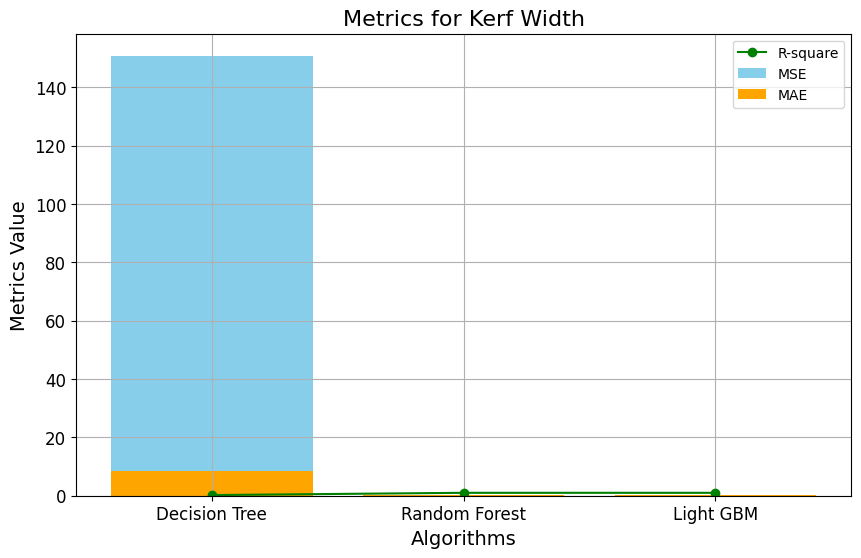

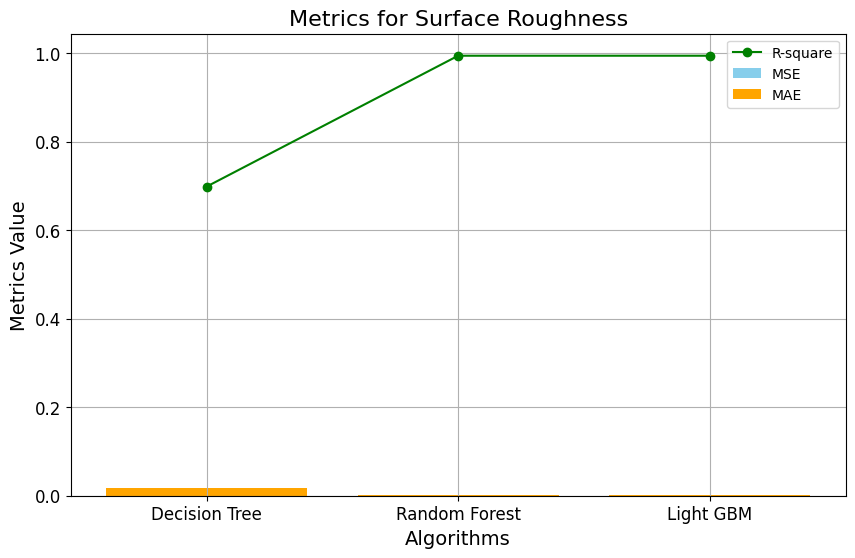

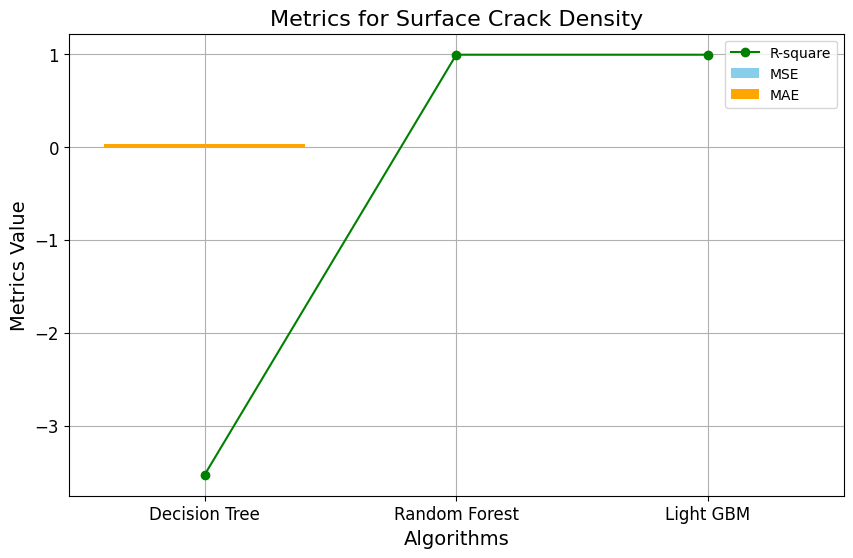

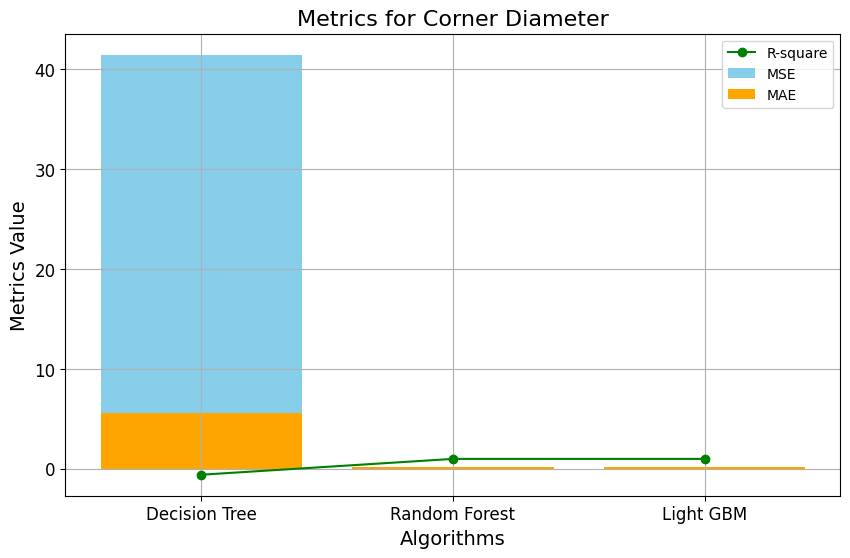

In [ ]:
import matplotlib.pyplot as plt

# Metrics data for Kerf Width
algorithms_kerf = ['Decision Tree', 'Random Forest', 'Light GBM']
mse_kerf = [150.871, 0.2272, 0.2338]
mae_kerf = [8.4933, 0.2295, 0.2818]
r2_kerf = [0.2275, 0.9989, 0.9988]

# Metrics data for Surface Roughness
algorithms_roughness = ['Decision Tree', 'Random Forest', 'Light GBM']
mse_roughness = [0.0003, 9.0232e-06, 9.0342e-06]
mae_roughness = [0.0166, 0.0016, 0.0017]
r2_roughness = [0.6987, 0.9947, 0.9947]

# Metrics data for Surface Crack Density
algorithms_crack_density = ['Decision Tree', 'Random Forest', 'Light GBM']
mse_crack_density = [0.0012, 5.9868e-06, 5.9915e-06]
mae_crack_density = [0.0271, 0.0011, 0.0012]
r2_crack_density = [-3.5262, 0.9918, 0.9918]

# Metrics data for Corner Diameter
algorithms_corner_diameter = ['Decision Tree', 'Random Forest', 'Light GBM']
mse_corner_diameter = [41.4451, 0.1011, 0.1023]
mae_corner_diameter = [5.6333, 0.1657, 0.1941]
r2_corner_diameter = [-0.5859, 0.9978, 0.9978]

# Plotting metrics for Kerf Width
plt.figure(figsize=(10, 6))
plt.bar(algorithms_kerf, mse_kerf, color='skyblue', label='MSE')
plt.bar(algorithms_kerf, mae_kerf, color='orange', label='MAE')
plt.plot(algorithms_kerf, r2_kerf, marker='o', color='green', label='R-square')
plt.title('Metrics for Kerf Width', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Metrics Value', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig('kerf_width_metrics.png', dpi=300)
plt.show()

# Plotting metrics for Surface Roughness
plt.figure(figsize=(10, 6))
plt.bar(algorithms_roughness, mse_roughness, color='skyblue', label='MSE')
plt.bar(algorithms_roughness, mae_roughness, color='orange', label='MAE')
plt.plot(algorithms_roughness, r2_roughness, marker='o', color='green', label='R-square')
plt.title('Metrics for Surface Roughness', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Metrics Value', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig('surface_roughness_metrics.png', dpi=300)
plt.show()

# Plotting metrics for Surface Crack Density
plt.figure(figsize=(10, 6))
plt.bar(algorithms_crack_density, mse_crack_density, color='skyblue', label='MSE')
plt.bar(algorithms_crack_density, mae_crack_density, color='orange', label='MAE')
plt.plot(algorithms_crack_density, r2_crack_density, marker='o', color='green', label='R-square')
plt.title('Metrics for Surface Crack Density', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Metrics Value', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig('surface_crack_density_metrics.png', dpi=300)
plt.show()

# Plotting metrics for Corner Diameter
plt.figure(figsize=(10, 6))
plt.bar(algorithms_corner_diameter, mse_corner_diameter, color='skyblue', label='MSE')
plt.bar(algorithms_corner_diameter, mae_corner_diameter, color='orange', label='MAE')
plt.plot(algorithms_corner_diameter, r2_corner_diameter, marker='o', color='green', label='R-square')
plt.title('Metrics for Corner Diameter', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Metrics Value', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig('corner_diameter_metrics.png', dpi=300)
plt.show()


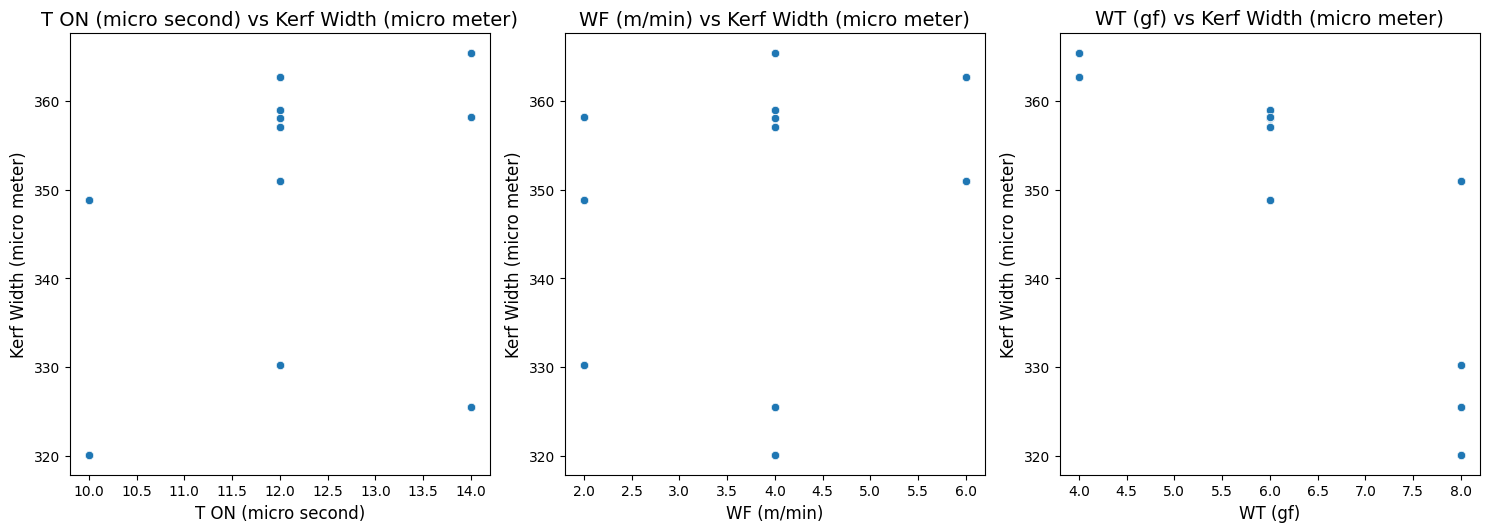

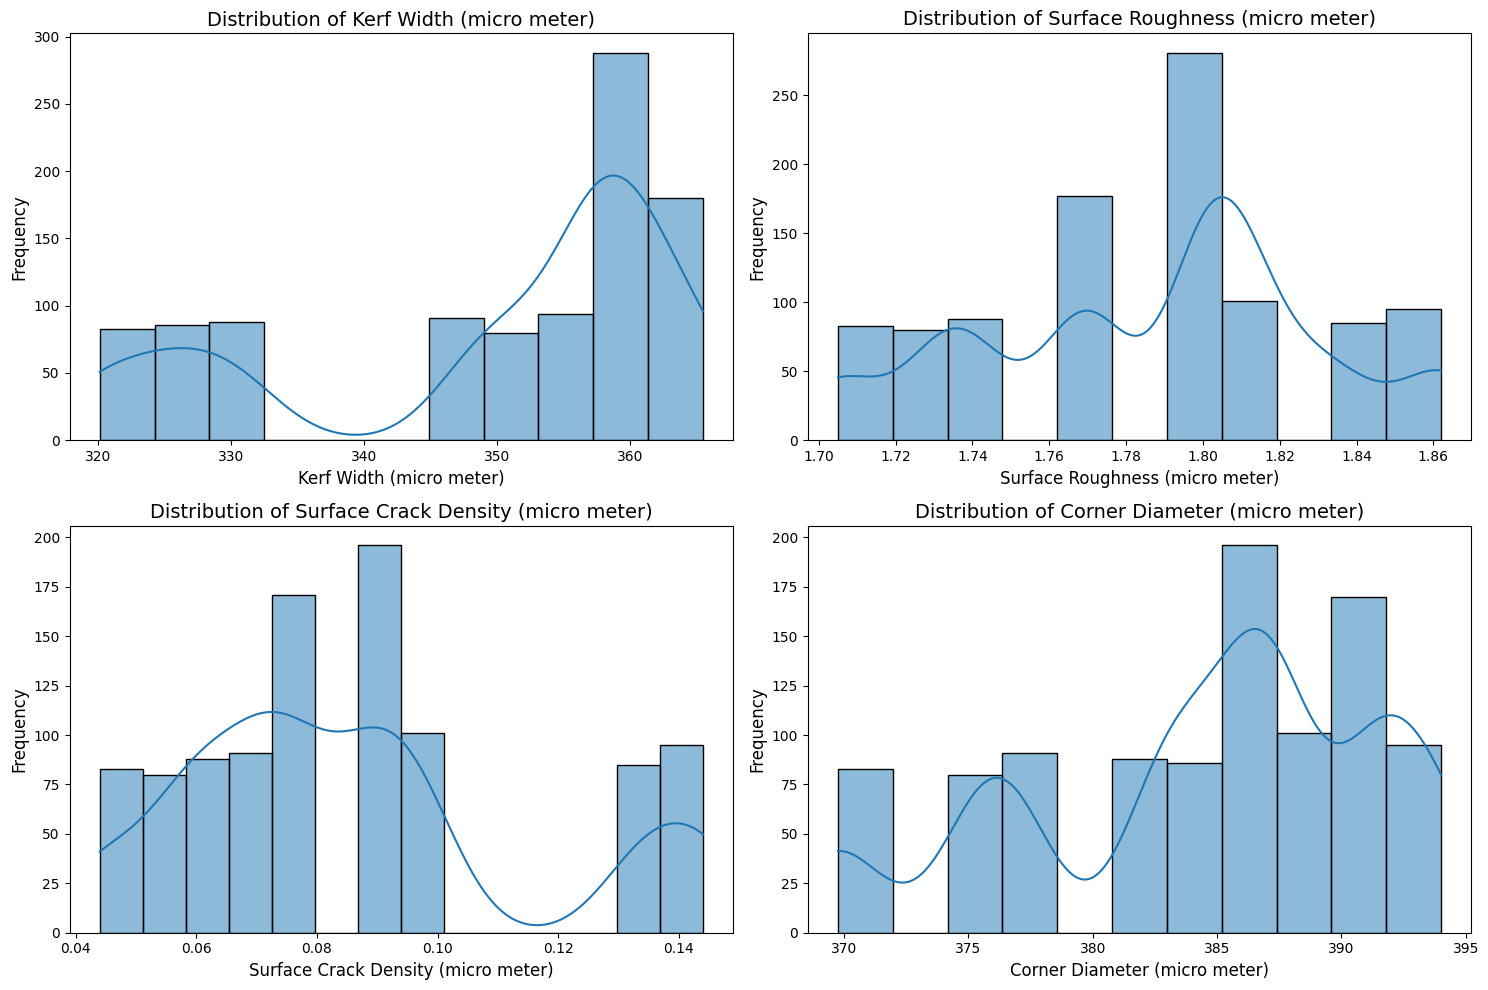

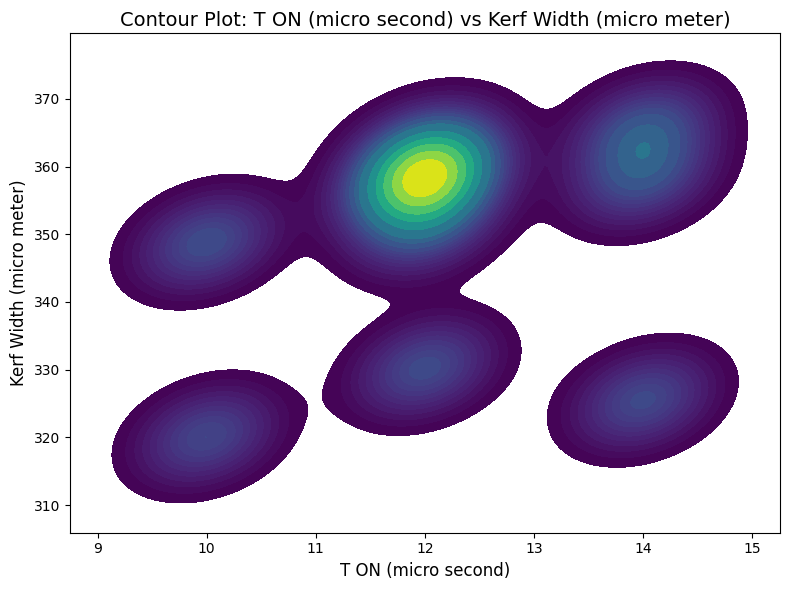

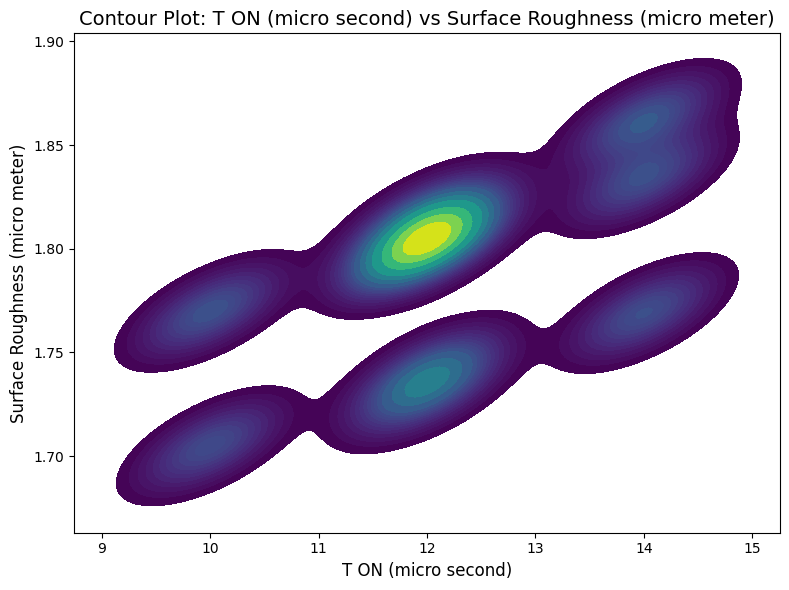

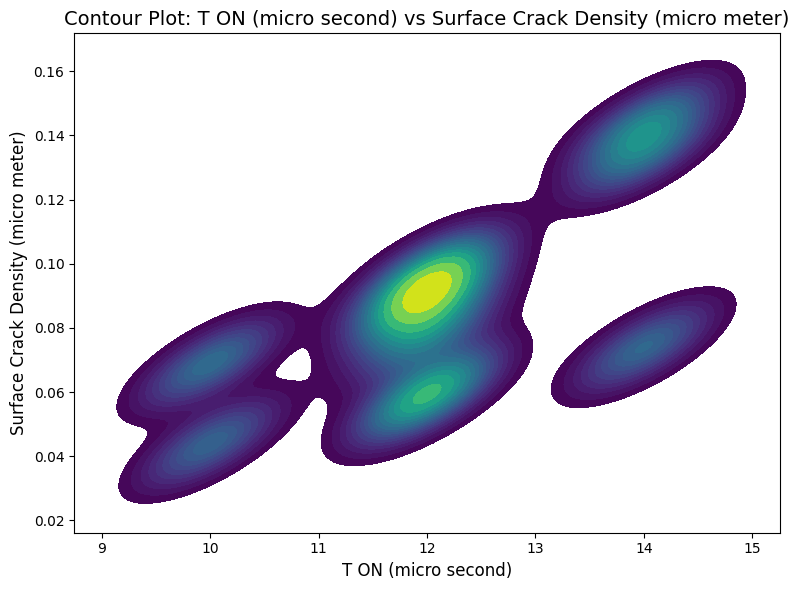

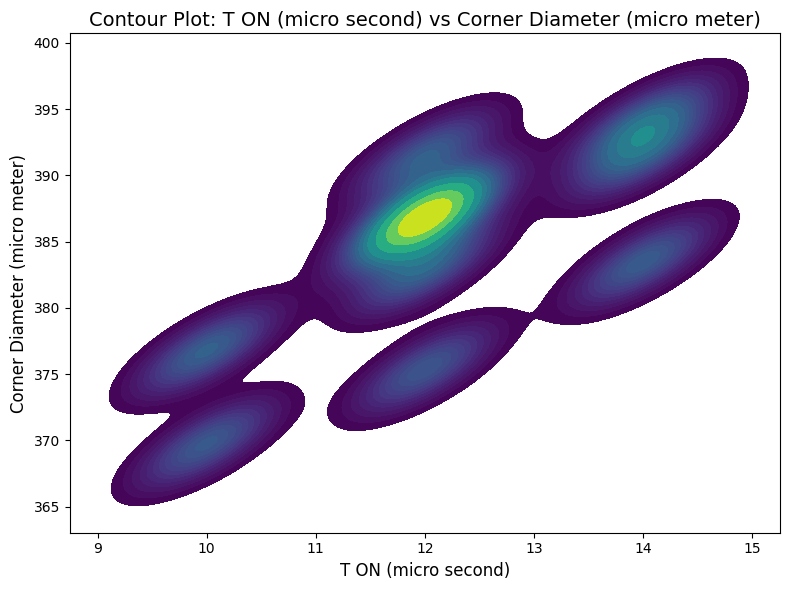

FileNotFoundError: [Errno 2] No such file or directory: 'contour_plot_WF_(m/min)_vs_Kerf_Width_(micro_meter).png'

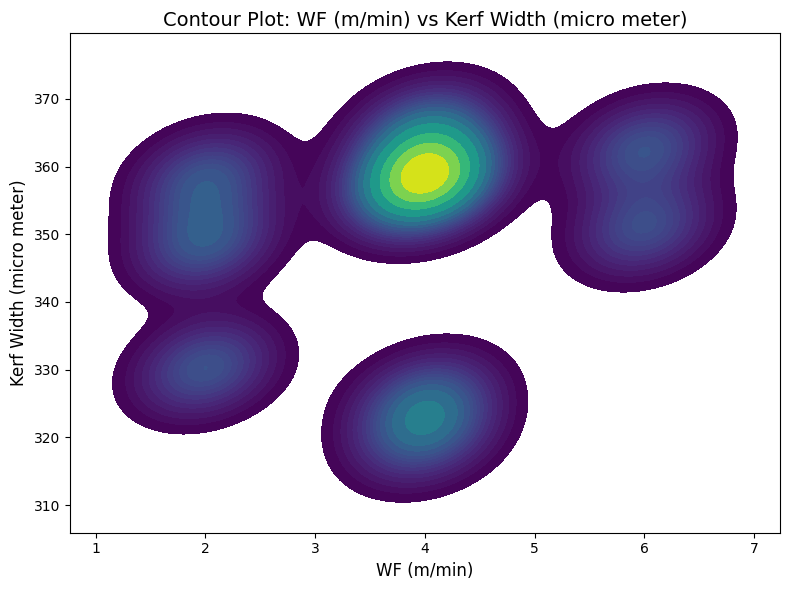

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("expanded.csv")

# Separate input and output features
input_features = ['T ON (micro second)', 'WF (m/min)', 'WT (gf)']
output_features = ['Kerf Width (micro meter)', 'Surface Roughness (micro meter)', 'Surface Crack Density (micro meter)', 'Corner Diameter (micro meter)']

# Create contour plots for each combination of input and output features
for input_feature in input_features:
    for output_feature in output_features:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df, x=input_feature, y=output_feature, fill=True, cmap='viridis', levels=20)
        plt.title(f'Contour Plot: {input_feature} vs {output_feature}', fontsize=14)
        plt.xlabel(input_feature, fontsize=12)
        plt.ylabel(output_feature, fontsize=12)
        plt.tight_layout()
        plt.savefig(f'contour_plot_{input_feature.replace(" ", "_")}_vs_{output_feature.replace(" ", "_")}.png', dpi=300)
        plt.show()


First few rows of the dataset:
   T ON (micro second)  WF (m/min)  WT (gf)  Kerf Width (micro meter)  \
0                   12           6        8                    350.97   
1                   10           2        6                    348.83   
2                   14           2        6                    358.24   
3                   14           4        4                    365.45   
4                   12           4        6                    359.03   

   Surface Roughness (micro meter)  Surface Crack Density (micro meter)  \
0                            1.731                                0.057   
1                            1.770                                0.069   
2                            1.834                                0.134   
3                            1.862                                0.144   
4                            1.803                                0.087   

   Corner Diameter (micro meter)  
0                         375.38  
1        

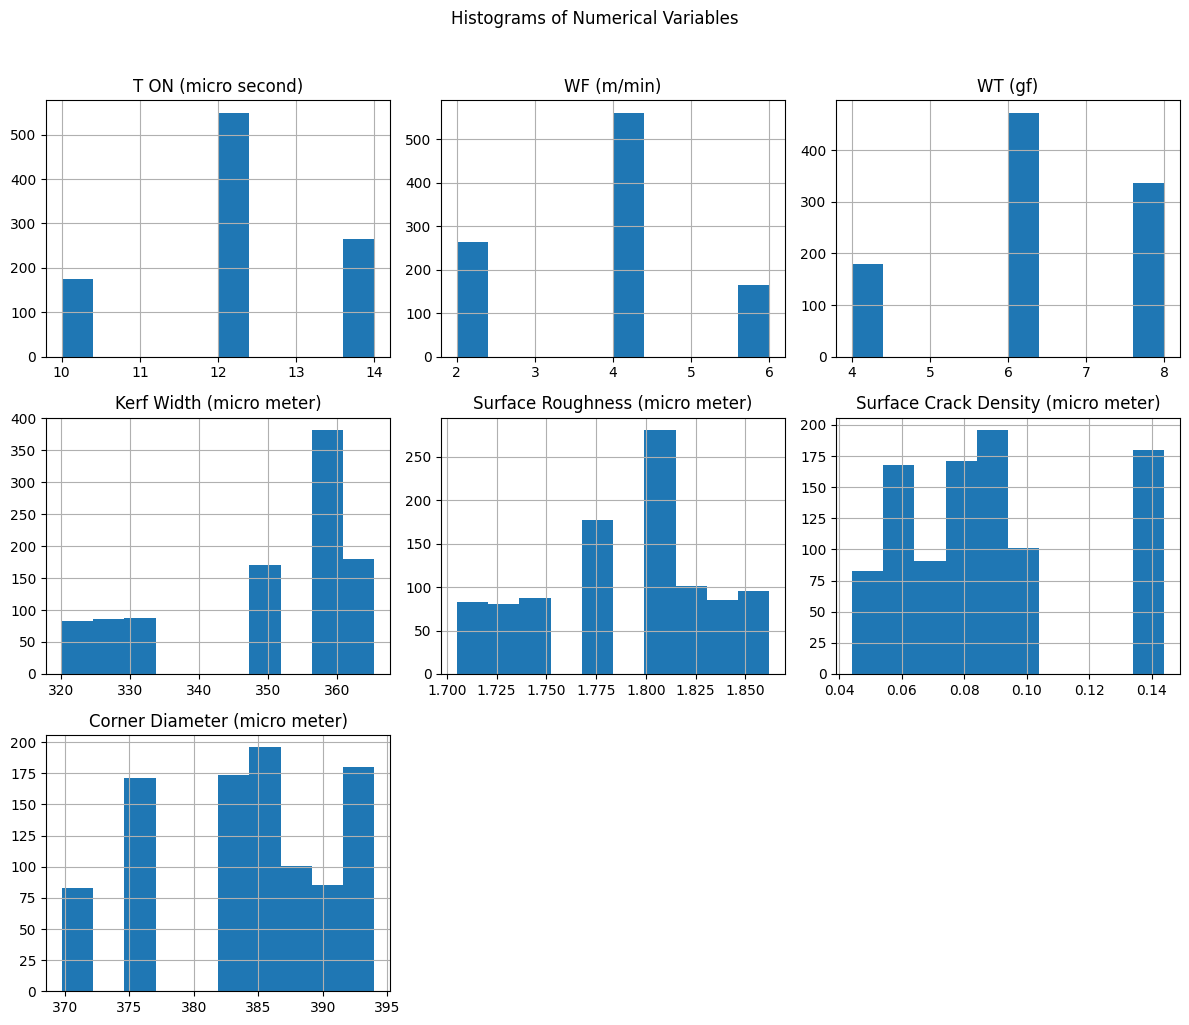

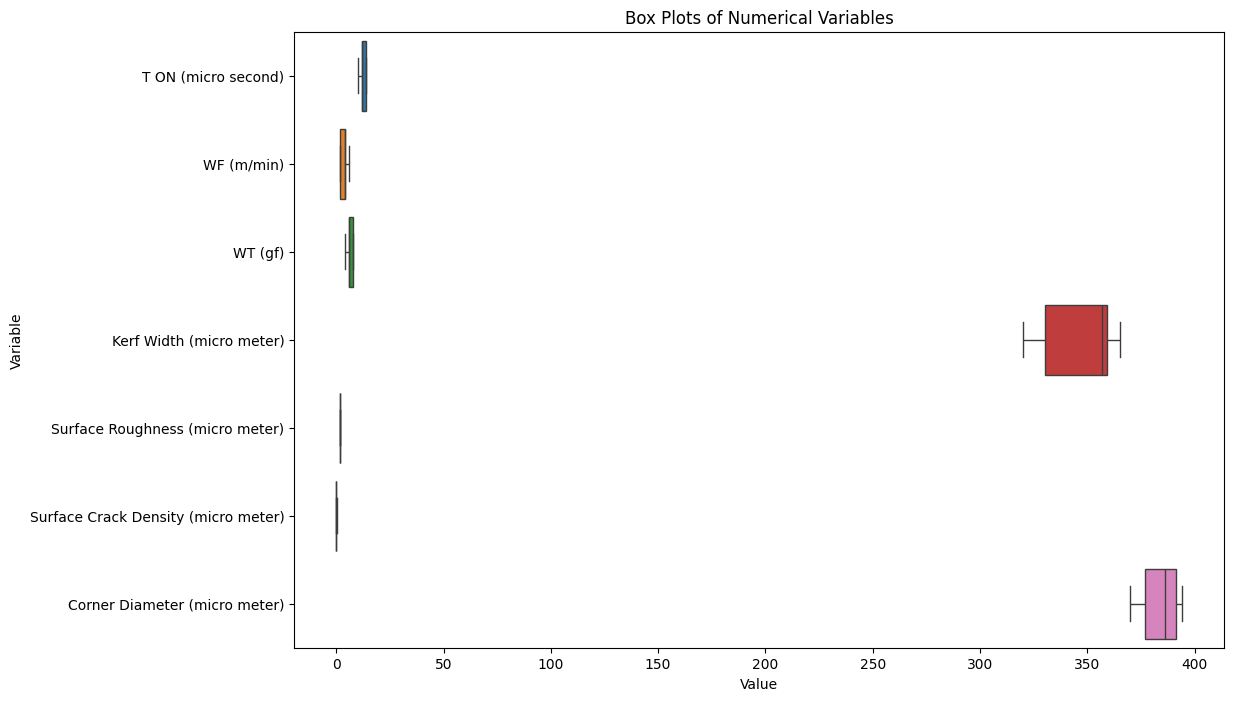

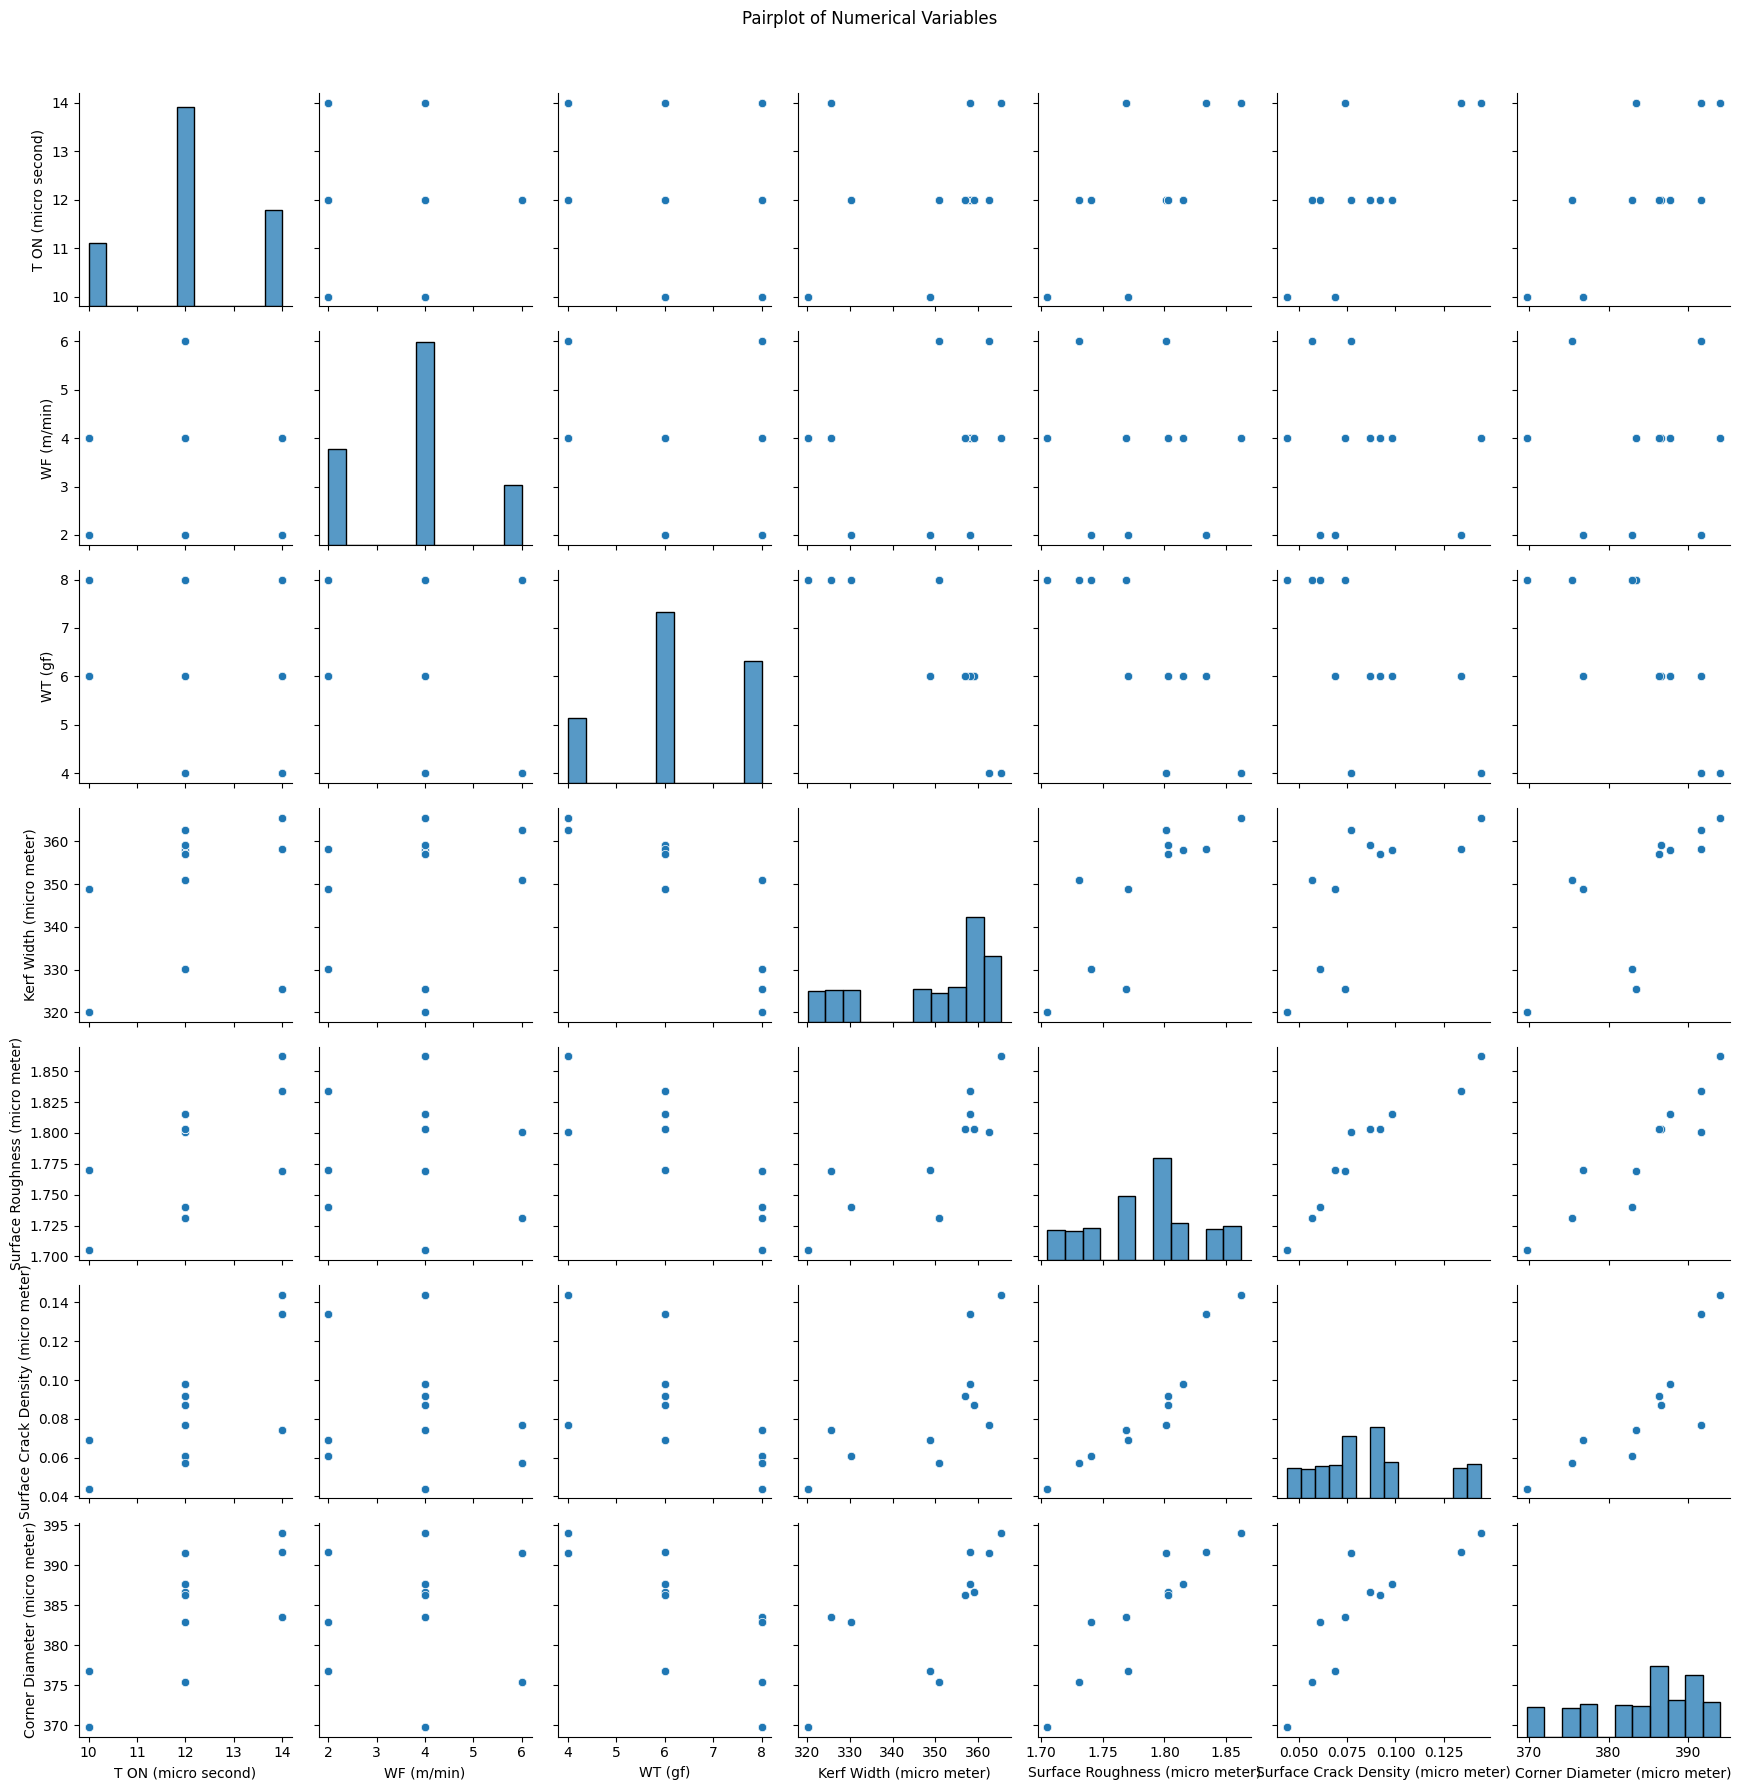

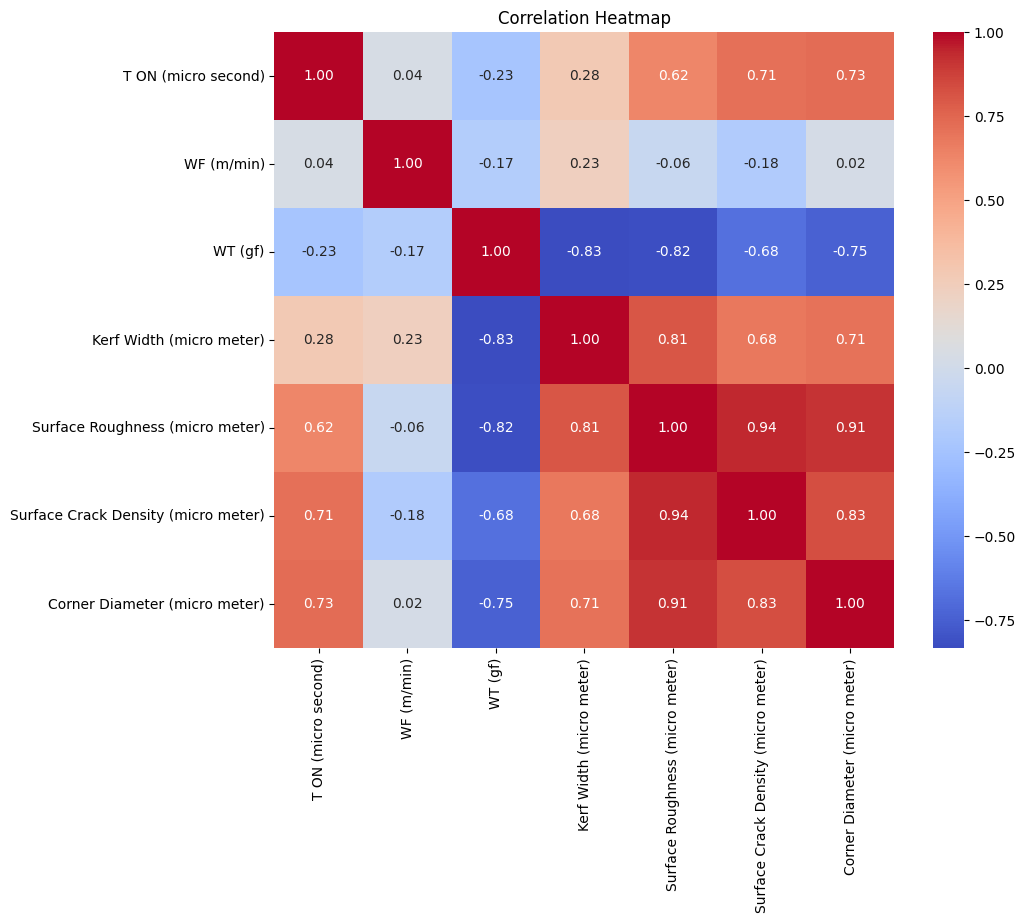

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("expanded.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics of numerical variables:")
print(df.describe())

# Data visualization

# Histograms for numerical variables
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Count plots for categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns
for col in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
